# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np



Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='Reacher.app')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher-Multi.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from rllib.agents import ActorCriticAgent
from rllib.models import QSequentialMLPModel

seed = 117  
agent = ActorCriticAgent(state_size, 
                 action_size, 
                 model_class_dict= {"model_class":QSequentialMLPModel, 
                                    'actor_hidden_layers':[128, 64, 32],
                                   'critic_hidden_layers':[128, 64, 32],
                                   'critic_input_layer':1}, 
                    agent_params ={'n_agents':num_agents},rnd=seed)        
        


Using: cpu


In [6]:
def train(n_episodes=10000, ep_max_time=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    eps = eps_start                    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        #print(state.shape)
        score = np.zeros(num_agents)
        for t in range(ep_max_time):
            action = agent.predict(state, epsilon=eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            
            done = env_info.local_done
            #print(reward, done)
            agent.step(state, action, next_state, reward, done)
            state = next_state
            score += reward

            if np.any(done):
                break 
                
        scores.append(np.mean(score))
        eps = max(eps_end, eps_decay*eps)
        print('Episode:', i_episode, ' Score:', np.mean(scores[-100:]))
        
        if np.mean(scores[-100:])>= 30.0:
            print('Solved!!! Episodes:', i_episode, ' Score:', np.mean(scores[-100:]))
            agent.save()
            break
    return scores

In [7]:
scores = train()

Episode: 1  Score: 0.1834999958984554
Episode: 2  Score: 0.17674999604932964
Episode: 3  Score: 0.16483332964902123
Episode: 4  Score: 0.15474999654106797
Episode: 5  Score: 0.15669999649748206
Episode: 6  Score: 0.13799999691545964
Episode: 7  Score: 0.14849999668076636
Episode: 8  Score: 0.14568749674363063
Episode: 9  Score: 0.14366666345546644
Episode: 10  Score: 0.13869999689981344
Episode: 11  Score: 0.13886363325979223
Episode: 12  Score: 0.1422916634862001
Episode: 13  Score: 0.14376922755573807
Episode: 14  Score: 0.14478571104950141
Episode: 15  Score: 0.14599999673664574
Episode: 16  Score: 0.1470937467121985
Episode: 17  Score: 0.14826470256837854
Episode: 18  Score: 0.15563888541008863
Episode: 19  Score: 0.16194736480124688
Episode: 20  Score: 0.16302499635610732
Episode: 21  Score: 0.16442856775330647
Episode: 22  Score: 0.16693181445060132
Episode: 23  Score: 0.17680434387420185
Episode: 24  Score: 0.193624995672144
Episode: 25  Score: 0.20935999532043936
Episode: 26  S

Episode: 211  Score: 23.52185447424557
Episode: 212  Score: 23.708584470071823
Episode: 213  Score: 23.866419466543945
Episode: 214  Score: 24.01310446326527
Episode: 215  Score: 24.162954459915866
Episode: 216  Score: 24.33293945611641
Episode: 217  Score: 24.492614452547397
Episode: 218  Score: 24.619874449702905
Episode: 219  Score: 24.75934444658551
Episode: 220  Score: 24.920469442984086
Episode: 221  Score: 25.075094439527952
Episode: 222  Score: 25.202859436672178
Episode: 223  Score: 25.326529433907943
Episode: 224  Score: 25.449369431162257
Episode: 225  Score: 25.603414427719084
Episode: 226  Score: 25.743979424577216
Episode: 227  Score: 25.87879942156375
Episode: 228  Score: 25.99888941887952
Episode: 229  Score: 26.11298941632919
Episode: 230  Score: 26.234579413611442
Episode: 231  Score: 26.330674411463548
Episode: 232  Score: 26.450624408782456
Episode: 233  Score: 26.60499440533202
Episode: 234  Score: 26.69375940334797
Episode: 235  Score: 26.78982440120075
Episode: 2

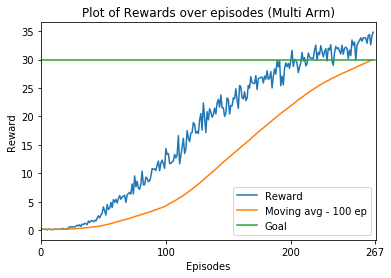

In [9]:
cum_score = []
for i in range(1,min(len(scores), 100)):
    cum_score.append(np.mean(scores[:i]))
    
for i in range(100, len(scores)):
    cum_score.append(np.mean(scores[i-100:i]))
                     
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scores)
plt.plot(cum_score)
plt.plot(np.linspace(0, len(scores), len(scores)+1), np.ones(len(scores)+1) * 30)

plt.xlim(0, len(scores)+1)
x_tick_list = [i*100 for i in range(len(scores)//100 +1)]
x_tick_list.append(len(scores))
plt.xticks(x_tick_list)
plt.title('Plot of Rewards over episodes (Multi Arm)')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend(["Reward", "Moving avg - 100 ep", "Goal"])
plt.show()

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores_test = np.zeros(num_agents)                          # initialize the score (for each agent)
agent.load('./multi_arm_chkpt')
while True:
    actions = agent.predict(states, False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores_test += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break